In [1]:
using Paths, Plots

STEINER_POINTS = 2

function draw(nodeDict)
    nodes = [item.second for item in nodeDict]
    edges = []
    s = scatter(map(x -> x.position, nodes), legend=nothing)
    for node in nodes
    # node = nodeDict[(3.5, 3.5)]
        for neighbor in node.neighbors
            plot!([node.position[1], neighbor.node.position[1]], [node.position[2], neighbor.node.position[2]], arrow=true)
        end
    end
    display(s)
end

function scatterNodes(nodeDict)
    nodes = [item.second for item in nodeDict]
    positions = map(x -> x.position, nodes)
    s = scatter(positions, legend=nothing)
    return s
end


function drawPath(source, path, s)
    pos = map(x -> x.node.position, path)
    pos = vcat([source], pos)
    for i in 1:length(pos)-1
        plot!([pos[i][1], pos[i+1][1]], [pos[i][2], pos[i+1][2]])
    end
    display(s)
end

drawPath (generic function with 1 method)

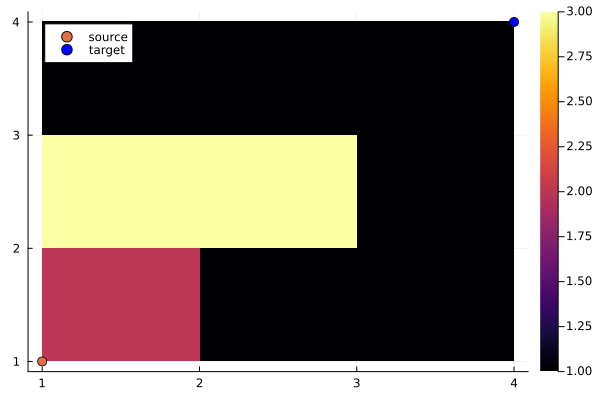

In [2]:
costs3 = [2. 3. 1.; 1. 3. 1.; 1. 1. 1.]
source = (1.0, 1.0)
target = (4.0, 4.0)
h = heatmap(1.5:3.5, 1.5:3.5, transpose(costs3))
scatter!(source, label="source", ms=5)
scatter!(target, label="target", color="blue", ms=5)

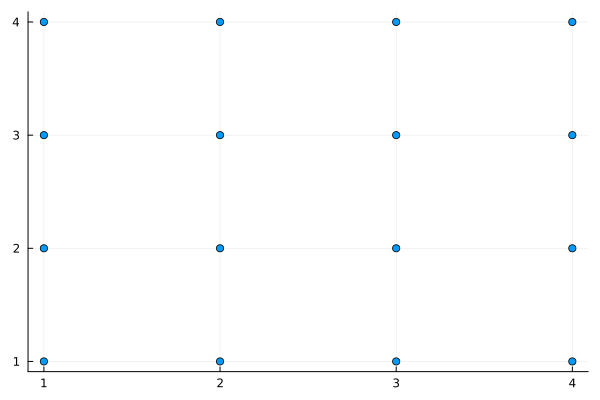

In [3]:
nodeDict, nodesByFace = Paths.constructOriginalGraph(costs3)
scatterNodes(nodeDict)

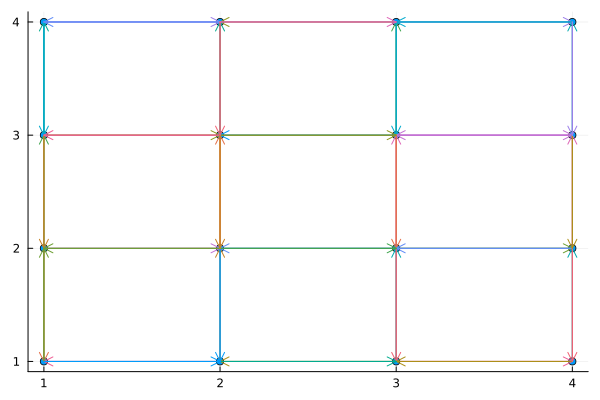

In [4]:
draw(nodeDict)

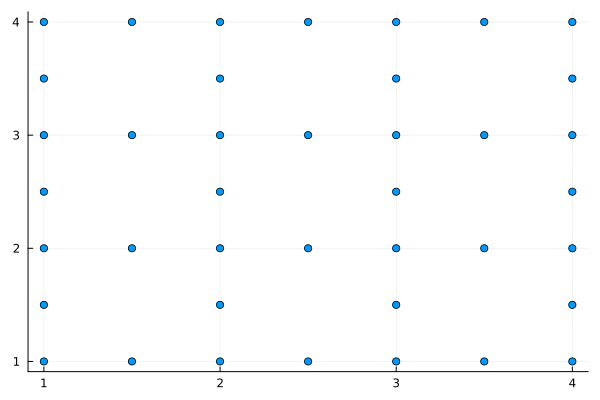

In [5]:
Paths.divideOriginalEdges!(nodeDict, nodesByFace, x->STEINER_POINTS)
scatterNodes(nodeDict)

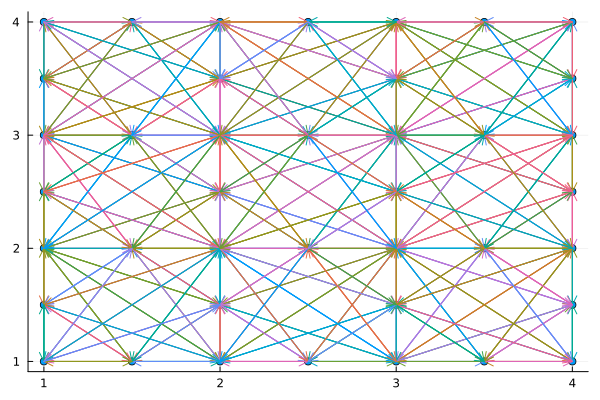

In [6]:
Paths.connectAcrossFaces!(nodeDict, nodesByFace, costs3)
draw(nodeDict)

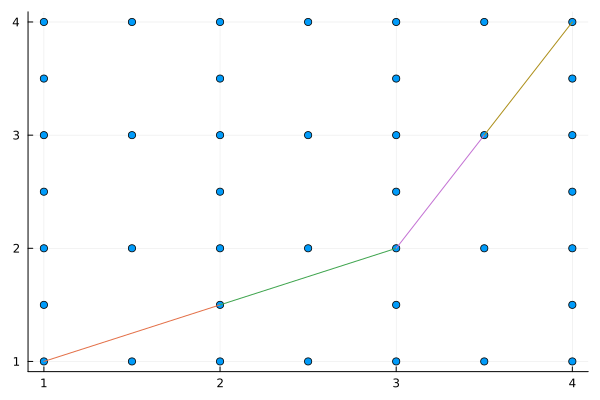

In [7]:
s = scatterNodes(nodeDict)
path = reverse(Paths.toArray(Paths.astar(nodeDict[source], nodeDict[target])))
drawPath(source, path, s)

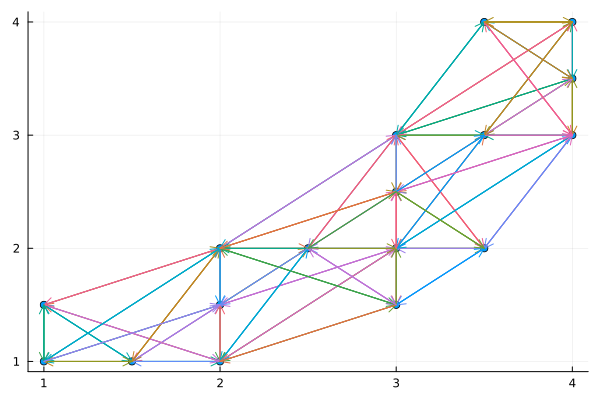

In [8]:
# sourceNode = nodeDict[source]
nodeDict, nodesByFace = Paths.resetNodes(nodeDict[source], path)
draw(nodeDict)

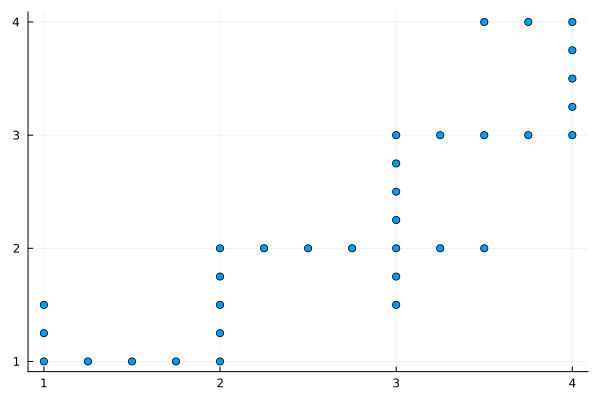

In [9]:
Paths.divideOriginalEdges!(nodeDict, nodesByFace, x->STEINER_POINTS)
display(scatterNodes(nodeDict))

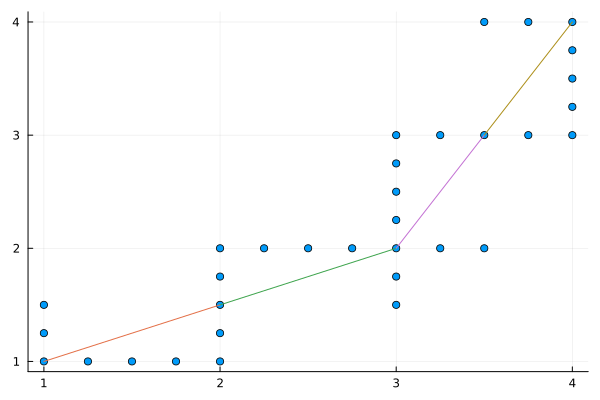

In [10]:
path = reverse(Paths.toArray(Paths.astar(nodeDict[source], nodeDict[target])))
drawPath(source, path, scatterNodes(nodeDict))

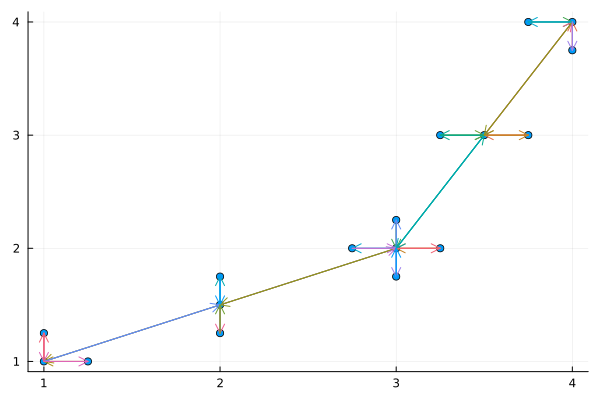

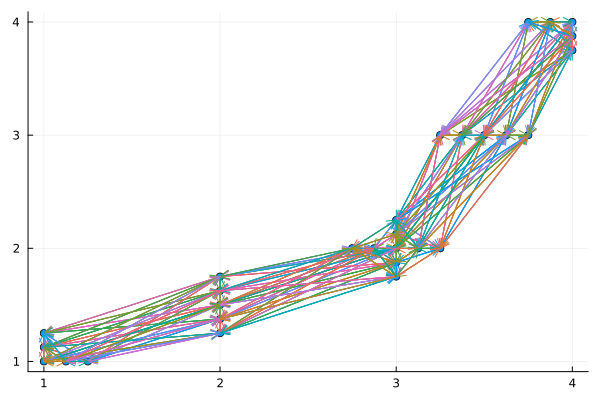

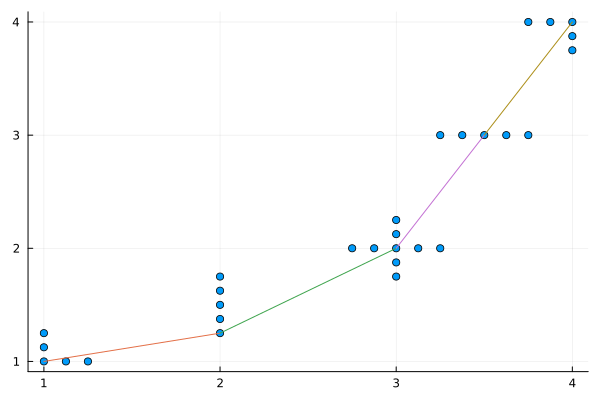

In [11]:
# sourceNode = nodeDict[source]
nodeDict, nodesByFace = Paths.resetNodes(nodeDict[source], path)
draw(nodeDict)
Paths.divideOriginalEdges!(nodeDict, nodesByFace)
scatterNodes(nodeDict)
Paths.connectAcrossFaces!(nodeDict, nodesByFace, costs3)
draw(nodeDict)
path = reverse(Paths.toArray(Paths.astar(nodeDict[source], nodeDict[target])))
drawPath(source, path, scatterNodes(nodeDict))

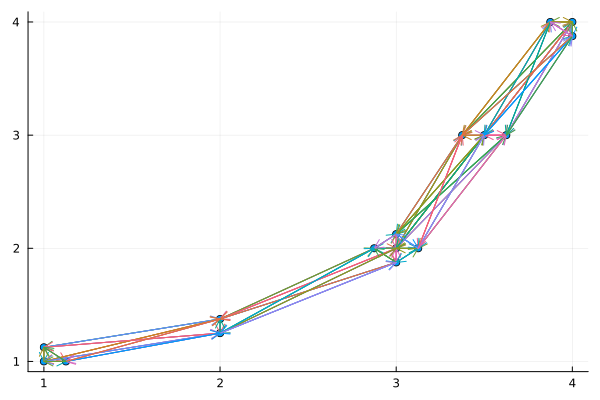

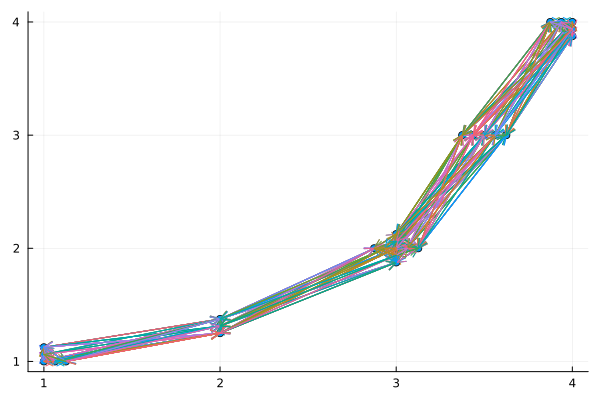

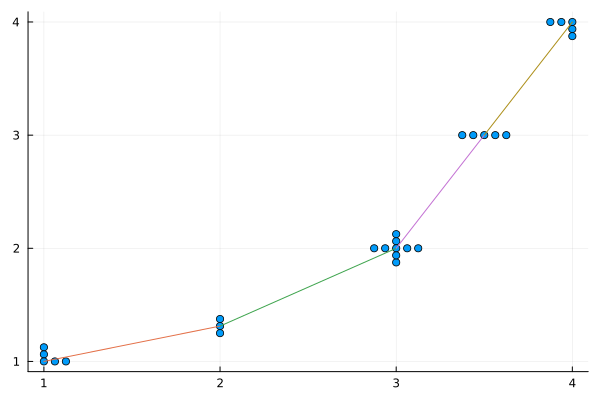

In [12]:
# sourceNode = nodeDict[source]
nodeDict, nodesByFace = Paths.resetNodes(nodeDict[source], path)
draw(nodeDict)
Paths.divideOriginalEdges!(nodeDict, nodesByFace)
Paths.connectAcrossFaces!(nodeDict, nodesByFace, costs3)
draw(nodeDict)
path = reverse(Paths.toArray(Paths.astar(nodeDict[source], nodeDict[target])))
drawPath(source, path, scatterNodes(nodeDict))

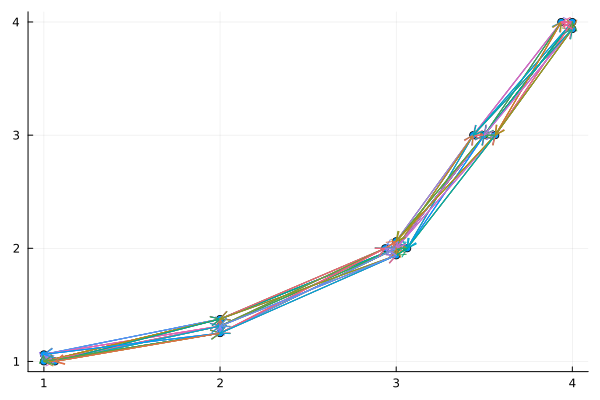

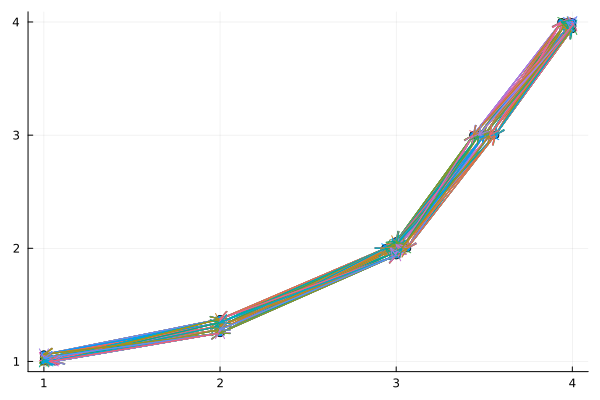

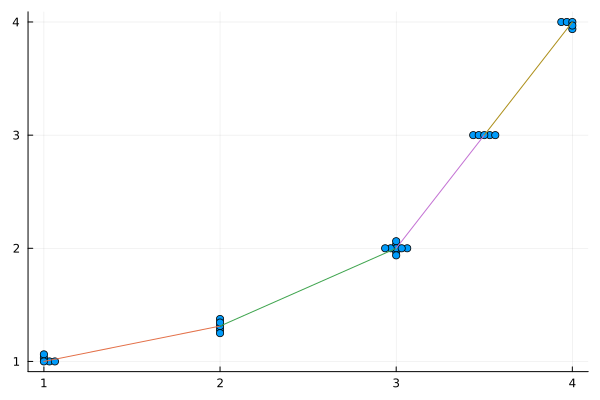

In [13]:
# sourceNode = nodeDict[source]
nodeDict, nodesByFace = Paths.resetNodes(nodeDict[source], path)
draw(nodeDict)
Paths.divideOriginalEdges!(nodeDict, nodesByFace)
Paths.connectAcrossFaces!(nodeDict, nodesByFace, costs3)
draw(nodeDict)
path = reverse(Paths.toArray(Paths.astar(nodeDict[source], nodeDict[target])))
drawPath(source, path, scatterNodes(nodeDict))